In [1]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import preprocessing

In [2]:
bank = pd.read_excel("/home/jatin/ML & AI/Dataset/dataset-20200805T105332Z-001/dataset/Bank_Personal_Loan_Modelling.xlsx",sheet_name=1)

In [3]:
bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
bank.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [5]:
bank.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

# Bank Modelling -- Random Forest

In [6]:
bank_mod = bank[['ID','Experience','Income','Family','CCAvg','Education','Mortgage','Personal Loan','Securities Account','CD Account','Online','CreditCard']]

In [7]:
bank_mod

,ID,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,1,49,4,1.6,1,0,0,1,0,0,0
1,2,19,34,3,1.5,1,0,0,1,0,0,0
2,3,15,11,1,1.0,1,0,0,0,0,0,0
3,4,9,100,1,2.7,2,0,0,0,0,0,0
4,5,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,3,40,1,1.9,3,0,0,0,0,1,0
4996,4997,4,15,4,0.4,1,85,0,0,0,1,0
4997,4998,39,24,2,0.3,3,0,0,0,0,0,0
4998,4999,40,49,3,0.5,2,0,0,0,0,1,0


In [8]:
bank_mod['Personal Loan'].head(100)

0     0
1     0
2     0
3     0
4     0
     ..
95    0
96    0
97    0
98    0
99    0
Name: Personal Loan, Length: 100, dtype: int64

In [9]:
rf_model = RandomForestClassifier(n_estimators=1000,max_depth=2,oob_score=True)

In [10]:
features = ['ID','Experience','Income','Family','CCAvg','Education','Mortgage','Securities Account','CD Account','Online','CreditCard']

In [11]:
rf_model.fit(X=bank_mod[features],y=bank_mod['Personal Loan'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [12]:
print("OOB Accuracy::")
print(rf_model.oob_score_)

OOB Accuracy::
0.918


In [13]:
for features,imp in zip(features,rf_model.feature_importances_):
    print(features,imp)

ID 0.006474371844721483
Experience 0.002984832456562612
Income 0.3511998689325075
Family 0.05555005060750846
CCAvg 0.24333244489962533
Education 0.10790799855080914
Mortgage 0.07334107408292072
Securities Account 0.0014358321868051696
CD Account 0.15511855035639954
Online 0.0002927837492953197
CreditCard 0.0023621923328447708


# Training Data -- Decision Tree

In [15]:
predictors = pd.DataFrame([bank_mod['Income'],bank_mod['CCAvg'],bank_mod['Education'],bank_mod['CD Account']]).T

In [16]:
tree_model = tree.DecisionTreeRegressor(max_depth=8)

In [17]:
tree_model.fit(X=predictors,y=bank_mod['Personal Loan'])

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [18]:
tree_model.score(X=predictors,y=bank_mod['Personal Loan'])

0.8603112630517716

In [20]:
with open("Bank_loan.dot","w") as f:
    f = tree.export_graphviz(tree_model,feature_names=['Income','CCAvg','Education','CD Account'],out_file=f)

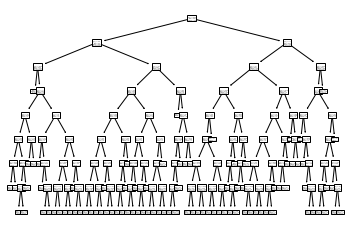

In [22]:
tree.plot_tree(tree_model);